# Módulo 10 tarefa 03
Considere a mesma base de dados utilizada na tarefa 1 ```previsao_de_renda.csv```.

1) Construa um gráfico de barras para avaliar a distribuição das variáveis qualitativas no tempo. Você acha que houve alguma alteração importante a ser investigada?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [3]:
df = pd.read_csv("previsao_de_renda.csv", index_col='index', parse_dates=True, infer_datetime_format=True)
df = df.drop("Unnamed: 0", axis=1)
df['data_ref'] = pd.to_datetime(df['data_ref'])
df

,data_ref,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,mau,renda
index,,,,,,,,,,,,,,
8682,2015-01-01,F,False,True,1,Assalariado,Secundário,Casado,Casa,36,3.575342,3.0,False,3369.24
12830,2015-01-01,M,True,True,0,Empresário,Secundário,Casado,Casa,42,0.860274,2.0,False,6096.14
2885,2015-01-01,M,True,True,2,Assalariado,Superior completo,Casado,Casa,31,8.065753,4.0,False,5658.98
16168,2015-01-01,F,True,False,0,Empresário,Secundário,Casado,Casa,50,1.208219,2.0,False,7246.69
12438,2015-01-01,M,False,False,0,Assalariado,Secundário,Casado,Casa,52,13.873973,2.0,False,4017.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3678,2016-03-01,M,True,True,1,Assalariado,Secundário,Casado,Casa,37,2.046575,3.0,False,1193.29
3405,2016-03-01,M,True,True,1,Servidor público,Superior completo,Casado,Estúdio,30,12.079452,3.0,False,2519.18
7944,2016-03-01,F,True,True,0,Assalariado,Secundário,Casado,Casa,40,2.161644,2.0,False,1586.85


Text(0.5, 1.0, 'Sexo')

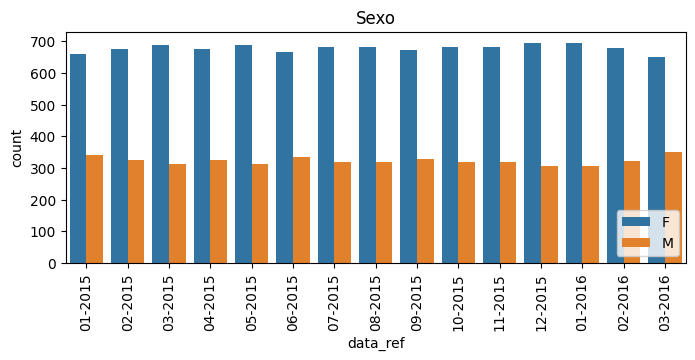

In [4]:
plt.figure(figsize=(8,3))

ax = sns.countplot(df, x='data_ref', hue='sexo')
labels = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticklabels(labels, rotation=90)

plt.legend(loc='lower right')
plt.title("Sexo")

Text(0.5, 1.0, 'Posse de veículo')

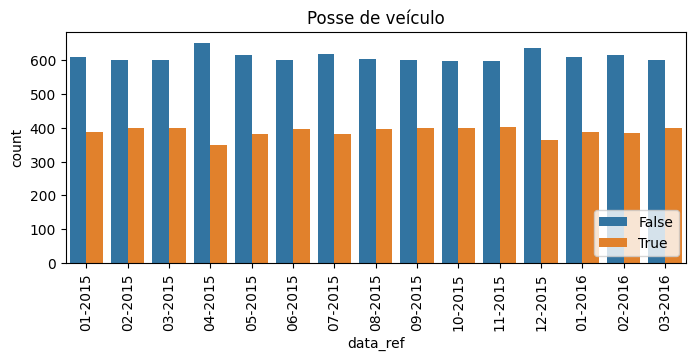

In [5]:
plt.figure(figsize=(8,3))

ax = sns.countplot(df, x='data_ref', hue='posse_de_veiculo')
labels = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticklabels(labels, rotation=90)

plt.legend(loc='lower right')
plt.title("Posse de veículo")

Text(0.5, 1.0, 'Posse de imóvel')

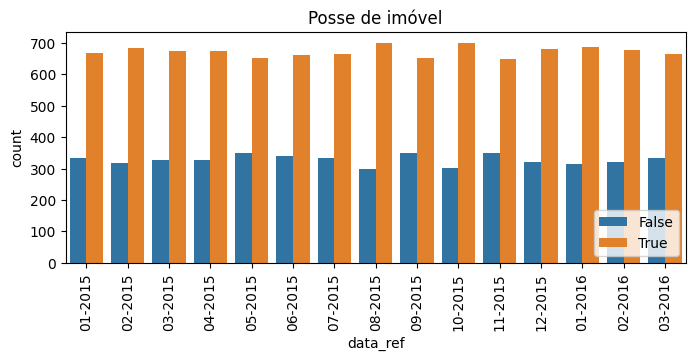

In [6]:
plt.figure(figsize=(8,3))

ax = sns.countplot(df, x='data_ref', hue='posse_de_imovel')
labels = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticklabels(labels, rotation=90)

plt.legend(loc='lower right')
plt.title("Posse de imóvel")

Text(0.5, 1.0, 'Quantidade de filhos')

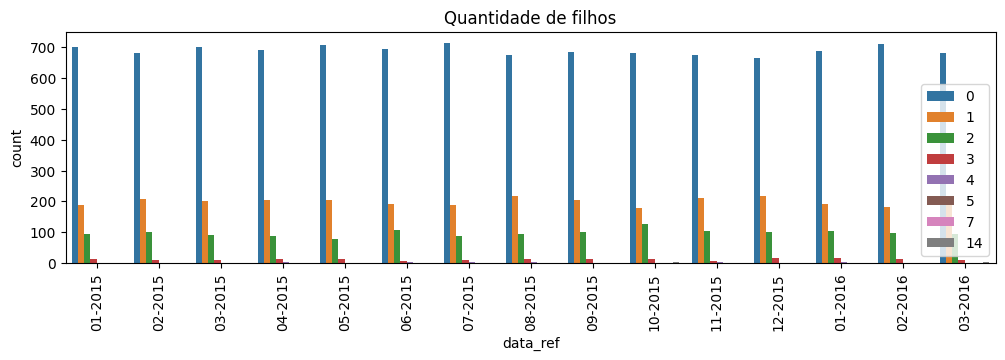

In [7]:
plt.figure(figsize=(12,3))

ax = sns.countplot(df, x='data_ref', hue='qtd_filhos')
labels = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticklabels(labels, rotation=90)

plt.legend(loc='lower right')
plt.title("Quantidade de filhos")

Text(0.5, 1.0, 'Educação')

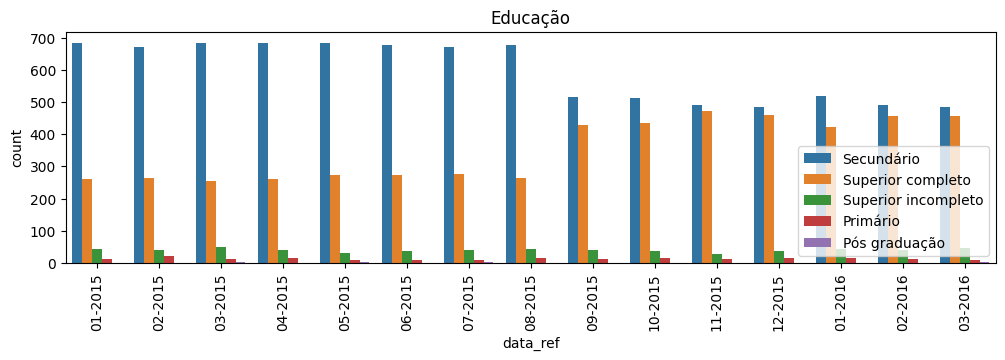

In [8]:
plt.figure(figsize=(12,3))

ax = sns.countplot(df, x='data_ref', hue='educacao')
labels = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticklabels(labels, rotation=90)

plt.legend(loc='lower right')
plt.title("Educação")

Text(0.5, 1.0, 'Estado Civil')

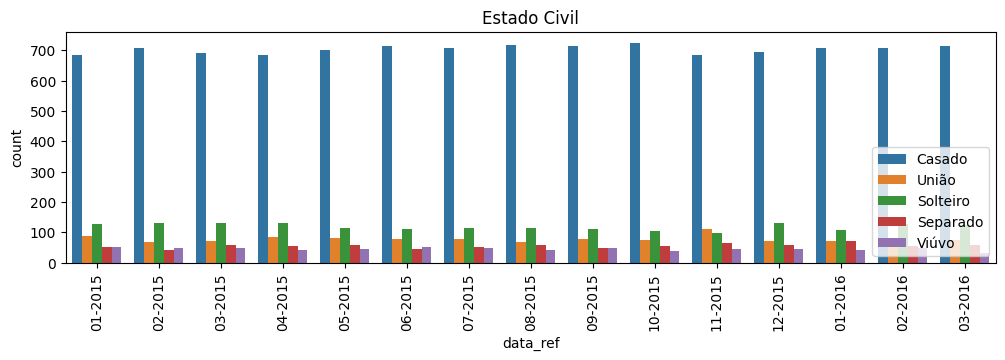

In [9]:
plt.figure(figsize=(12,3))

ax = sns.countplot(df, x='data_ref', hue='estado_civil')
labels = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticklabels(labels, rotation=90)

plt.legend(loc='lower right')
plt.title("Estado Civil")

Text(0.5, 1.0, 'Tipo de residência')

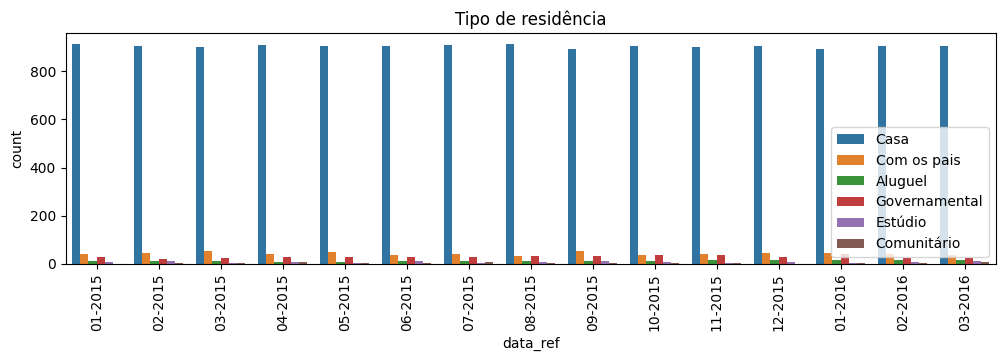

In [10]:
plt.figure(figsize=(12,3))

ax = sns.countplot(df, x='data_ref', hue='tipo_residencia')
labels = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = ax.set_xticklabels(labels, rotation=90)

plt.legend(loc='lower right')
plt.title("Tipo de residência")

2) Para cada variável qualitativa, construa um gráfico mostrando as médias de cada nível da variável no tempo e avalie a estabilidade. Houve alguma alteração importante? Você acha que se pode utilizar essas variáveis em uma modelagem?

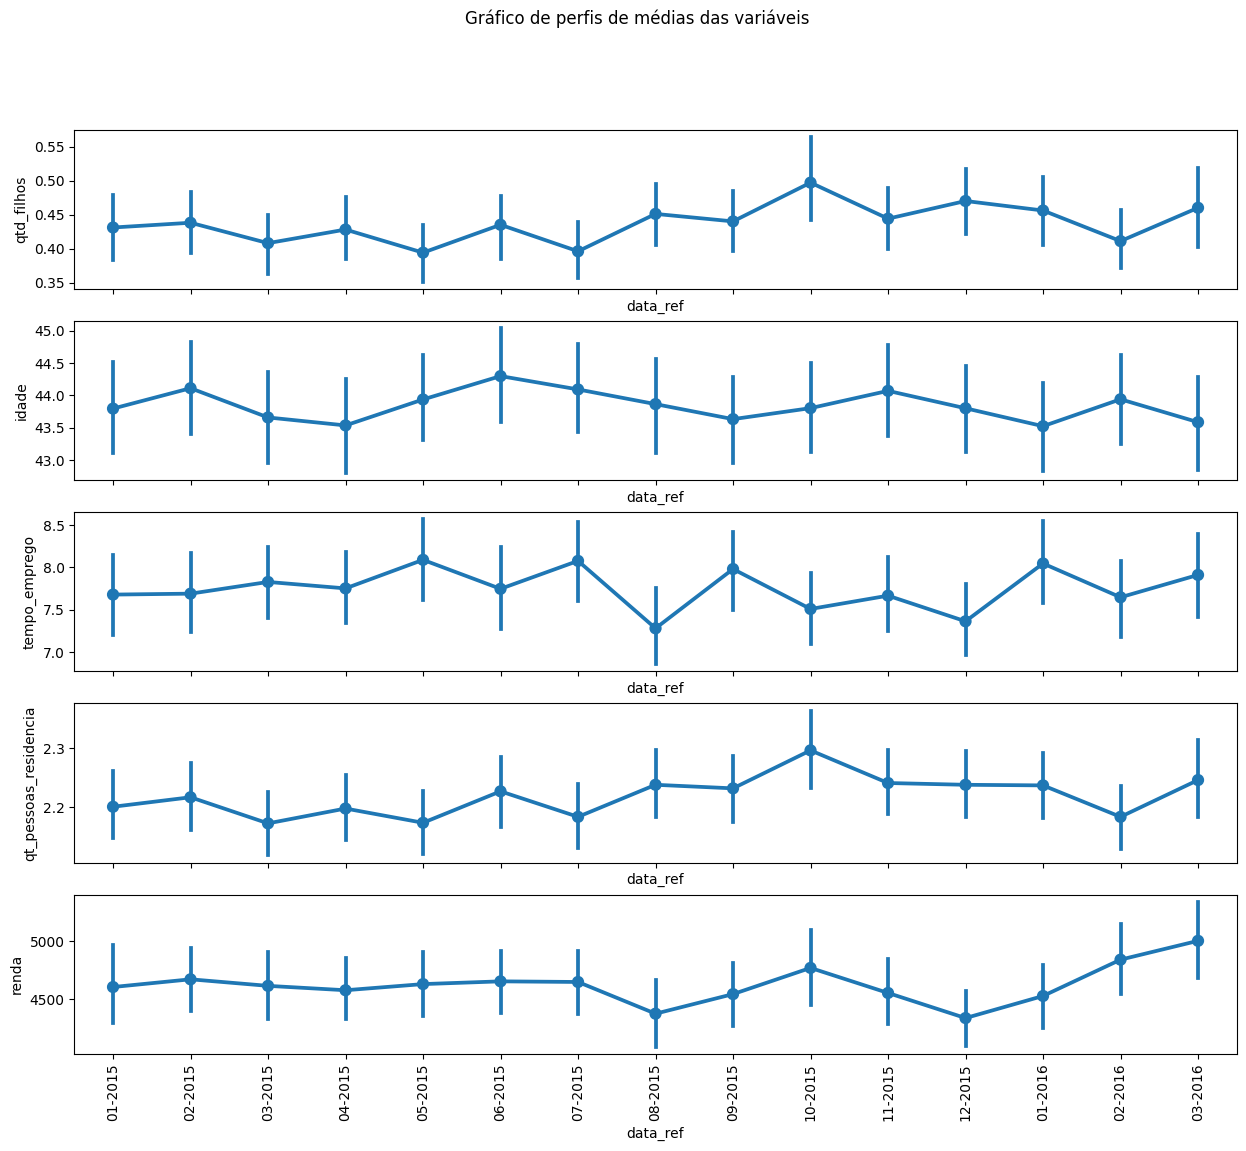

In [41]:
fig, axes = plt.subplots(5, figsize=(15, 12), sharex=True)
fig.suptitle("Gráfico de perfis de médias das variáveis")

sns.pointplot(ax=axes[0], data=df, x="data_ref", y="qtd_filhos", errorbar=('ci', 95))
sns.pointplot(ax=axes[1], data=df, x="data_ref", y="idade", errorbar=('ci', 95))
sns.pointplot(ax=axes[2], data=df, x="data_ref", y="tempo_emprego", errorbar=('ci', 95))
sns.pointplot(ax=axes[3], data=df, x="data_ref", y="qt_pessoas_residencia", errorbar=('ci', 95))
sns.pointplot(ax=axes[4], data=df, x="data_ref", y="renda", errorbar=('ci', 95))

labels = df['data_ref'].map(lambda ts: ts.strftime("%m-%Y")).unique()
ticks = axes[4].set_xticklabels(labels, rotation=90)
